In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data = pd.read_csv("/content/flipkart_reviews.csv")
print(data.head())

                                        Product_name  \
0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   

                                              Review  Rating  
0  Best under 60k Great performanceI got it for a...       5  
1                                 Good perfomence...       5  
2  Great performance but usually it has also that...       5  
3           My wife is so happy and best product 👌🏻😘       5  
4  Light weight laptop with new amazing features,...       5  


In [ ]:
print(data.isnull().sum())

Product_name    0
Review          0
Rating          0
dtype: int64


In [ ]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["Review"] = data["Review"].apply(clean)

<>:11: SyntaxWarning:

invalid escape sequence '\['

<>:12: SyntaxWarning:

invalid escape sequence '\S'

<>:16: SyntaxWarning:

invalid escape sequence '\w'

<>:11: SyntaxWarning:

invalid escape sequence '\['

<>:12: SyntaxWarning:

invalid escape sequence '\S'

<>:16: SyntaxWarning:

invalid escape sequence '\w'

/tmp/ipython-input-2764912191.py:11: SyntaxWarning:

invalid escape sequence '\['

/tmp/ipython-input-2764912191.py:12: SyntaxWarning:

invalid escape sequence '\S'

/tmp/ipython-input-2764912191.py:16: SyntaxWarning:

invalid escape sequence '\w'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
ratings = data["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(data,
             values=quantity,
             names=numbers,hole = 0.5)
figure.show()

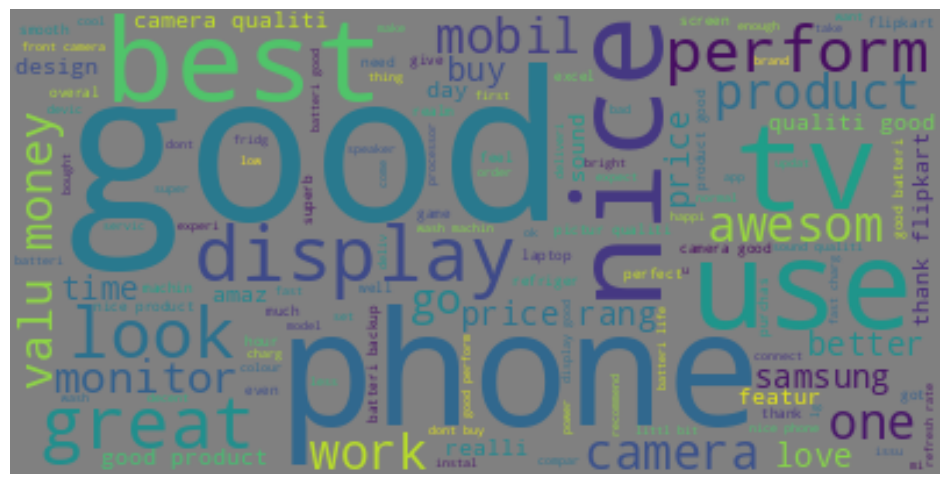

In [ ]:
text = " ".join(i for i in data.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="grey").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
data = data[["Review", "Rating", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


KeyError: "['Rating'] not in index"

In [ ]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [ ]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  923.553
Negative:  96.775
Neutral:  1283.688


In [ ]:
def get_sentiment_label(row):
    if row["Positive"] > row["Negative"] and row["Positive"] > row["Neutral"]:
        return "positive"
    elif row["Negative"] > row["Positive"] and row["Negative"] > row["Neutral"]:
        return "negative"
    else:
        return "neutral"

data["Sentiment"] = data.apply(get_sentiment_label, axis=1)

data[["Review", "Sentiment"]].head()

,Review,Sentiment
0,best great performancei got around backup bi...,neutral
1,good perfom,positive
2,great perform usual also game laptop issu batt...,neutral
3,wife happi best product 👌🏻😘,positive
4,light weight laptop new amaz featur batteri li...,neutral


In [ ]:
from sklearn.model_selection import train_test_split

X = data["Review"]
y = data["Sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vec, y_train)


LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

predictions = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


Accuracy: 0.9501084598698482
              precision    recall  f1-score   support

    negative       1.00      0.67      0.80         9
     neutral       0.93      0.99      0.96       302
    positive       0.99      0.88      0.93       150

    accuracy                           0.95       461
   macro avg       0.97      0.85      0.90       461
weighted avg       0.95      0.95      0.95       461



In [ ]:
sample = ["This product is amazing and works perfectly"]
sample_vec = vectorizer.transform(sample)

print("Predicted sentiment:", model.predict(sample_vec)[0])


Predicted sentiment: neutral


In [ ]:
import plotly.express as px

sentiment_totals = {
    "Positive": data["Positive"].sum(),
    "Negative": data["Negative"].sum(),
    "Neutral": data["Neutral"].sum()
}

fig = px.bar(
    x=list(sentiment_totals.keys()),
    y=list(sentiment_totals.values()),
    title="Sentiment Distribution",
    labels={"x": "Sentiment", "y": "Score Total"}
)

fig.show()


In [ ]:
fig = px.scatter(
    data,
    x="Positive",
    y="Negative",
    size="Neutral",
    title="Sentiment Polarity Visualization"
)

fig.show()
